The goal is to find the optimol portfolio based on Sharp Ratio
Optimizer /(portfolio mean - risk-free rate)/ (std deviation of portfolio)

In [45]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime
import scipy.optimize as optimization

In [4]:
stocks = ['AAPL', 'WMT', 'TSLA', 'GE', 'AMZN','DB']
start_date = '01/01/2010'
end_date = '01/01/2017'
def download_data(stocks):
    data = web.DataReader(stocks, data_source = 'yahoo', start = start_date, end = end_date)['Adj Close']
    data.columns = stocks
    returns = np.log(data/data.shift(1)) # cc returns of my data
    return data, returns

def random_weights(length):
    weights = np.random.random(length)
    return (weights/np.sum(weights))
            
def portfolio_return(returns, weights):
    expected_return = np.sum((weights)*(returns.mean()*252))
    return expected_return
            
def portfolio_variance(returns, weights):
    portfolio_var = np.dot(np.transpose(weights), np.dot(returns.cov()*252, weights))
    return (np.sqrt(portfolio_var))

AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)


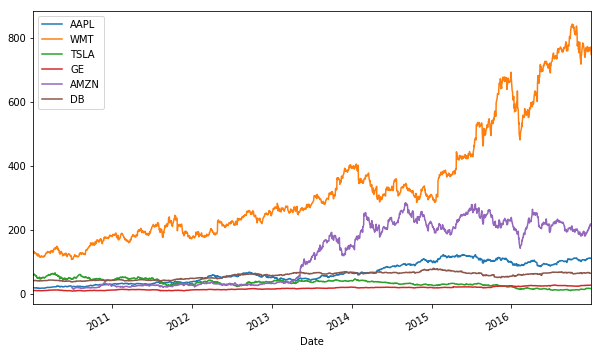

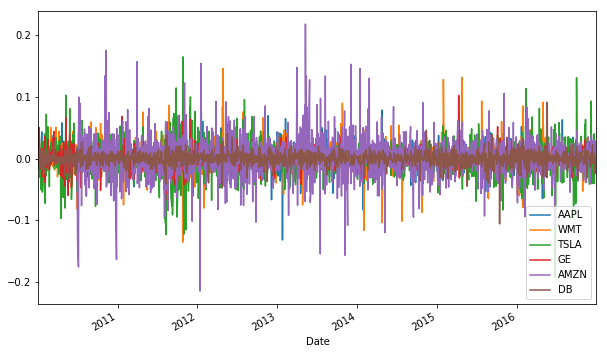

In [5]:
data = download_data(stocks)[0]
returns = download_data(stocks)[1]
print(data.plot(figsize = (10,6)))
print(returns.plot(figsize = (10,6)))

STATISTICS OF PORTFOLIO

In [16]:
print(returns.mean()*252)
print(returns.cov()*252)

AAPL    0.243564
WMT     0.246535
TSLA   -0.174201
GE      0.136637
AMZN    0.336881
DB      0.060349
dtype: float64
          AAPL       WMT      TSLA        GE      AMZN        DB
AAPL  0.070043  0.027655  0.036202  0.021878  0.030556  0.009878
WMT   0.027655  0.104095  0.045057  0.025832  0.047326  0.010755
TSLA  0.036202  0.045057  0.175727  0.054796  0.052338  0.020155
GE    0.021878  0.025832  0.054796  0.047390  0.027286  0.013015
AMZN  0.030556  0.047326  0.052338  0.027286  0.274985  0.010949
DB    0.009878  0.010755  0.020155  0.013015  0.010949  0.026701


MONTE CARLO SIMULATION


In [18]:
def random_portfolios(returns):
    preturns = []
    pvariances = []
    
    for i in range(10000):
        weights = random_weights(6)
        preturns.append(portfolio_return(returns,weights))
        pvariances.append(portfolio_variance(returns, weights))
        
    preturns = np.array(preturns)
    pvariances = np.array(pvariances)
    return preturns, pvariances
 

Text(0, 0.5, 'Expected Returns')

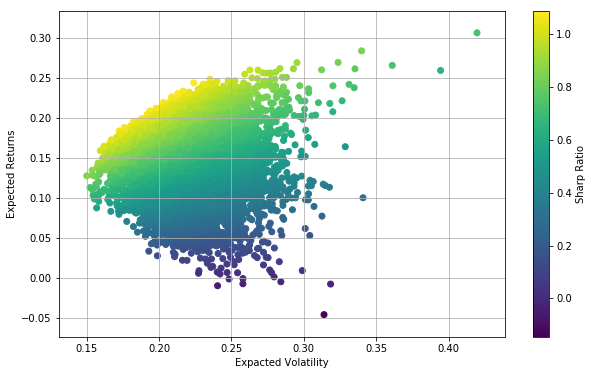

In [36]:
simulation = random_portfolios(returns)
plt.figure(figsize = (10,6))
plt.grid(True)
plt.scatter(simulation[1], simulation[0], c =simulation[0]/simulation[1], marker = 'o')
plt.colorbar(label = "Sharp Ratio")
plt.xlabel('Expacted Volatility')
plt.ylabel('Expected Returns')

OPTIMIZATION

In [61]:
weights  = random_weights(6)
def statistics (weights, returns):
    portfolio_return = np.sum((weights)*(returns.mean()*252))
    portfolio_volatility = np.sqrt(np.dot(np.transpose(weights), np.dot(returns.cov()*252, weights)))
    return np.array([portfolio_return, portfolio_volatility, (portfolio_return/portfolio_volatility)])

def min_func(weights, returns):
    return -statistics(weights, returns)[2]
    
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) -1}) 
bounds = tuple((0,1) for x in range(len(stocks))) 
optimum = optimization.minimize(fun = min_func, x0 = weights, args = returns, method = 'SLSQP', bounds = bounds, constraints = cons)# arg is the other parameter in FUN, f(x,y)
print ('The optimol portfolio/tangency is ', optimum['x'])

The optimol portfolio/tangency is  [0.4700818  0.23320312 0.         0.11645542 0.12697067 0.05328898]


Let's show the optimol portfolio on the graph

Text(0, 0.5, 'Expected Returns')

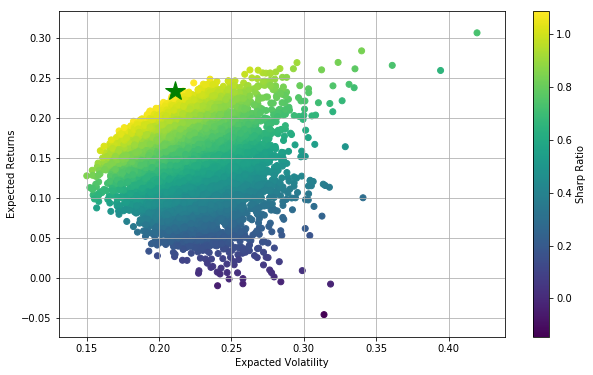

In [62]:
plt.figure(figsize = (10,6))
plt.grid(True)
plt.scatter(simulation[1], simulation[0], c =simulation[0]/simulation[1], marker = 'o')
plt.plot(portfolio_variance(returns,optimum['x'] ), portfolio_return(returns, optimum['x']), 'g*', markersize = 20)
plt.colorbar(label = "Sharp Ratio")
plt.xlabel('Expacted Volatility')
plt.ylabel('Expected Returns')

In [65]:
print ("Sharp Ratio is ", portfolio_return(returns, optimum['x'])/portfolio_variance(returns,optimum['x']) )

Sharp Ratio is  1.1089733891649598


The Sharp Ratio is greater than 1 which is considered as good investment!